In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
carbon_emissions = pd.read_csv("Carbon Emissions.csv",index_col=0)

**Adding Car to Bus reduction factor column**

Factor =  Carbon Emissions of Car / Carbon Emissions

Carbon Emissions of Car = (Average Occupancy / 1.3) * 0.265

Carbon Emissions must also be converted to kilograms for comparison. All electric buses are already calculated in the kilograms so they do not need to be converted.

In [34]:
carbon_emissions['reduction factor'] = (carbon_emissions['Average Occupancy']/1.3 * 0.265) / (carbon_emissions['CO2emissions'])

In [40]:
carbon_emissions

,Date,Route,Route Variant,Direction,Trip Number,Vehicle Number,Actual Vehicle Type,Vehicle Emissions Standard,Start Minute (Sched),Actual Running Time,...,Cancelled Trips,Sighted Stops (%),Day of Week,Speed,Average Occupancy,TARE Weight (KG),CO2emissions,emissions savings,emissions $value,reduction factor
0,2022-07-01,1,1_1,Inbound,1020,3517,DD,EURO6,23:45:00,3120,...,0,0.942308,Friday,24.506538,8.104619,14940.0,22.471519,3.052730,0.001955,0.073520
1,2022-07-01,1,1_1,Inbound,1040,3713,ELVDD,ELECTRIC,05:45:00,3480,...,0,0.980769,Friday,21.971379,11.489147,11520.0,2.527441,4.327565,0.000220,0.926636
2,2022-07-01,1,1_1,Inbound,1120,3719,ELVDD,ELECTRIC,06:45:00,4020,...,0,0.980769,Friday,19.020000,38.846085,11580.0,2.527441,14.631980,0.000220,3.133060
3,2022-07-01,1,1_1,Inbound,1180,3703,ELVDD,ELECTRIC,07:05:00,4860,...,0,0.961538,Friday,15.732593,25.341824,12070.0,2.527441,9.545391,0.000220,2.043899
4,2022-07-01,1,1_1,Inbound,1240,3705,ELVDD,ELECTRIC,07:25:00,5580,...,0,1.000000,Friday,13.702581,25.726870,11980.0,2.527441,9.690424,0.000220,2.074954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053494,2023-06-30,953,953_2,Inbound,1020,3142,MV,EURO6,08:20:00,1080,...,0,1.000000,Friday,31.506667,27.851354,7560.0,6.737427,4.668655,0.000586,0.842665
1053495,2023-06-30,953,953_3,Outbound,1030,3312,LV,EURO6,15:05:00,1620,...,0,1.000000,Friday,25.906667,23.813519,12165.0,11.203584,4.923448,0.000975,0.433280
1053496,2023-06-30,953,953_4,Outbound,1010,3151,MV,EURO6,15:05:00,1380,...,0,1.000000,Friday,32.637391,16.371513,7560.0,8.400714,3.632475,0.000731,0.397260
1053497,2023-06-30,955,955_1,Inbound,1000,3416,LV,EURO6,07:57:00,1800,...,0,1.000000,Friday,24.108000,32.460096,12080.0,12.253242,6.939094,0.001066,0.540009


In [57]:
mean_route_carbon_emissions = carbon_emissions.groupby(['Date','Route Variant', 'Day of Week']).mean()
mean_route_carbon_emissions

# Create a pivot table
pivot_table = mean_route_carbon_emissions.pivot_table(
    values='reduction factor',
    index='Route Variant',  # Pass a list for multiple index columns
    columns='Day of Week',
    aggfunc='mean'
)

Day of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Route Variant,,,,,,,
110_1,0.070346,NaN,0.058036,0.067086,0.080307,0.080408,0.081360
110_2,NaN,0.087601,NaN,NaN,NaN,NaN,NaN
110_3,0.072550,0.079279,0.068131,NaN,0.083607,0.085283,0.081838
111_1,NaN,NaN,0.110579,NaN,0.186898,NaN,NaN
111_2,NaN,0.078450,NaN,NaN,NaN,0.079283,0.086100
...,...,...,...,...,...,...,...
953_2,NaN,0.667015,NaN,NaN,NaN,0.715684,NaN
953_3,NaN,0.378992,NaN,NaN,NaN,NaN,inf
953_4,NaN,0.575059,NaN,NaN,0.527088,0.567473,NaN


In [60]:
pivot_table.index.tolist()

['110_1',
 '110_2',
 '110_3',
 '111_1',
 '111_2',
 '111_3',
 '111_4',
 '111_5',
 '112_1',
 '112_2',
 '113_1',
 '113_2',
 '113_3',
 '114_1',
 '114_2',
 '115_1',
 '115_2',
 '115_3',
 '120_1',
 '120_2',
 '120_3',
 '120_4',
 '121_1',
 '121_10',
 '121_2',
 '121_4',
 '121_5',
 '121_6',
 '121_7',
 '121_8',
 '121_9',
 '12_1',
 '12_2',
 '12_3',
 '12_4',
 '130_1',
 '130_2',
 '130_3',
 '130_4',
 '13_1',
 '145_1',
 '145_2',
 '145_5',
 '145_6',
 '14_1',
 '14_10',
 '14_11',
 '14_12',
 '14_13',
 '14_2',
 '14_5',
 '14_6',
 '14_7',
 '14_8',
 '14_9',
 '150_1',
 '150_2',
 '150_3',
 '150_4',
 '154_1',
 '154_3',
 '160_1',
 '160_2',
 '160_3',
 '160_4',
 '160_5',
 '160_6',
 '170_1',
 '170_2',
 '170_3',
 '17_1',
 '17_3',
 '17_4',
 '17_5',
 '18_1',
 '18_2',
 '19_1',
 '19_3',
 '1_1',
 '1_10',
 '1_12',
 '1_13',
 '1_14',
 '1_16',
 '1_17',
 '1_3',
 '1_5',
 '1_7',
 '1_8',
 '1_9',
 '200_1',
 '200_10',
 '200_11',
 '200_12',
 '200_13',
 '200_2',
 '200_3',
 '200_4',
 '200_6',
 '200_7',
 '200_8',
 '200_9',
 '201_1',
 '2

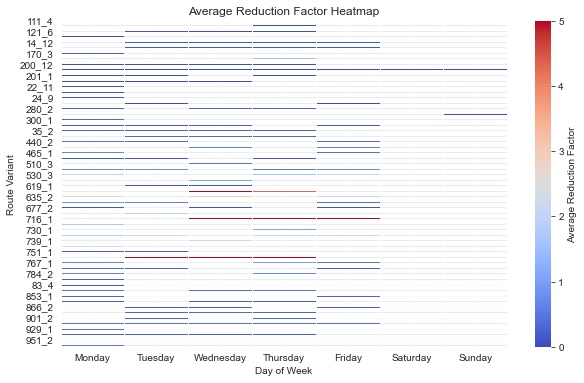

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named carbon_emissions
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table to reorganize the data
pivot_table = carbon_emissions.pivot_table(
    values='reduction factor',
    index='Route Variant',
    columns='Day of Week',
    aggfunc='mean'
)

pivot_table = pivot_table[custom_order]


# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=1, cbar_kws={'label': 'Average Reduction Factor'}, vmin= 0, vmax= 5)
plt.xlabel('Day of Week')
plt.ylabel('Route Variant')
plt.title('Average Reduction Factor Heatmap')
plt.show()


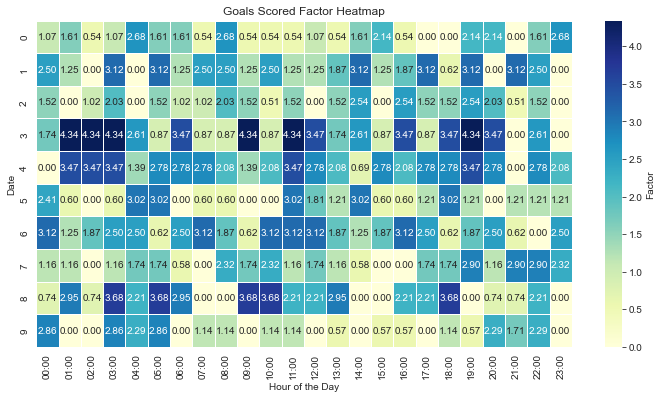

In [15]:
import pandas as pd
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of days
num_days = 10

# Create an empty DataFrame with columns for each hour of the day
hourly_columns = [f'{hour:02d}:00' for hour in range(24)]
df = pd.DataFrame(columns=['Date'] + hourly_columns)

# Set a start datetime for the data
start_date = datetime.datetime(2023, 9, 1, 0, 0, 0)

# Generate data for each day
for day in range(num_days):
    # Create hourly datetime range for the current day
    date_range = [start_date + datetime.timedelta(hours=hour) for hour in range(24)]

    # Generate random data for goals scored for each hour
    goals_scored = [random.randint(0, 5) for _ in range(24)]

    # Calculate the average goals scored for the day
    average_goals = random.uniform(1, 2)

    # Add data for the current day as a new row in the DataFrame
    df.loc[day] = [start_date.strftime('%Y-%m-%d')] + goals_scored

    # Increment the start_date for the next day
    start_date += datetime.timedelta(days=1)

# Add the 'Average Goals' column with random values between 1 and 2
df['Average Goals'] = [random.uniform(1, 2) for _ in range(num_days)]

# Divide hourly goals scored by the average rate
for hour in range(24):
    df[df.columns[hour+1]] /= df['Average Goals']

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, 1:25], cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Factor'})
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.title('Goals Scored Factor Heatmap')
plt.show()
